<a href="https://colab.research.google.com/github/Dianamikolo/Machine-Learning/blob/main/projet_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXAMEN SYSTEME INELLIGENT**

**Importation  des biblioth√®ques n√©cessaires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# G√©n√©rer des donn√©es simul√©es pour 2000 √©chantillons
# np.random.seed(42)
# n_samples = 2000

# data = {
#     'temp√©rature': np.random.uniform(15, 30, n_samples),  # Temp√©rature en ¬∞C
#     'luminosit√©': np.random.uniform(100, 800, n_samples),  # Luminosit√© en lux
#     'pr√©sence': np.random.choice([0, 1], n_samples),  # 0 = vide, 1 = occup√©
#     'consommation': np.random.uniform(100, 500, n_samples)  # Conso en Wh
# }

# df = pd.DataFrame(data)
# df.to_csv("consommation_energetique.csv", index=False)
# df.head()


temp√©rature  luminosit√©  pr√©sence  consommation
0    20.618102  283.193979         1    257.454208
1    29.260715  272.885159         0    289.374264
2    25.979909  734.378206         1    441.818957
3    23.979877  274.682340         0    236.001754
4    17.340280  290.364808         0    447.859874

***T√©l√©chargement du fichier csv***

In [ ]:
from google.colab import files
uploaded = files.upload()  # T√©l√©charge ton fichier ici

df = pd.read_csv("consommation_energetique.csv")
df.head()


Saving consommation_energetique.csv to consommation_energetique.csv


temp√©rature  luminosit√©  pr√©sence  consommation
0    20.618102  283.193979         1    257.454208
1    29.260715  272.885159         0    289.374264
2    25.979909  734.378206         1    441.818957
3    23.979877  274.682340         0    236.001754
4    17.340280  290.364808         0    447.859874

**Calcul de la corr√©lation**

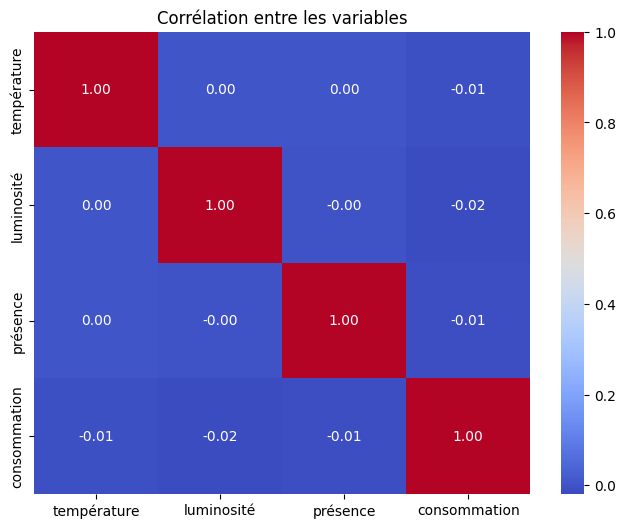

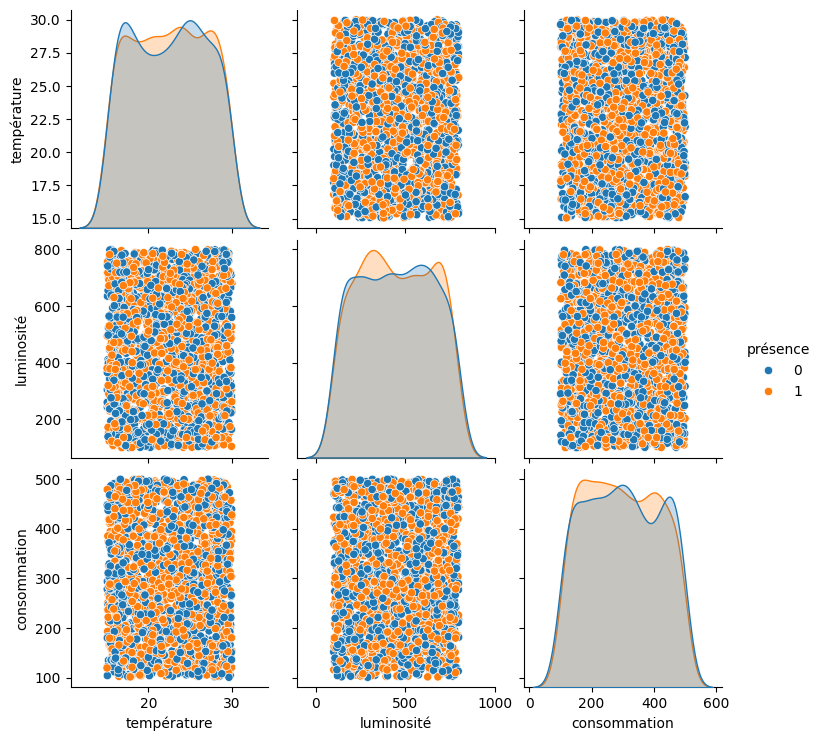

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corr√©lation entre les variables")
plt.show()

sns.pairplot(df, hue="pr√©sence")
plt.show()


**Pr√©paration des Donn√©es pour le Mod√®le**
**On normalise les donn√©es et on les divise en train/test **

In [ ]:
# S√©paration des features (X) et de la cible (y)
X = df[['temp√©rature', 'luminosit√©', 'pr√©sence']]
y = df['consommation']

# S√©paration des donn√©es en training (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des donn√©es
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Entra√Ænement du Mod√®le**

In [ ]:
# Initialisation et entra√Ænement du mod√®le
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Pr√©dictions sur les donn√©es test
y_pred = model.predict(X_test)


**√âvaluation du Mod√®le**
**On mesure l‚Äôerreur absolue moyenne (MAE) et l‚Äôerreur quadratique moyenne (MSE)**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"üìä √âvaluation du Mod√®le :")
print(f"MAE  : {mae:.2f} Wh (Erreur absolue moyenne)")
print(f"MSE  : {mse:.2f} Wh¬≤ (Erreur quadratique moyenne)")
print(f"RMSE : {rmse:.2f} Wh (Racine de l'erreur quadratique moyenne)")


üìä √âvaluation du Mod√®le :
MAE  : 105.30 Wh (Erreur absolue moyenne)
MSE  : 15758.77 Wh¬≤ (Erreur quadratique moyenne)
RMSE : 125.53 Wh (Racine de l'erreur quadratique moyenne)


**Visualisation des Pr√©dictions**
**On compare les vraies valeurs aux pr√©dictions**

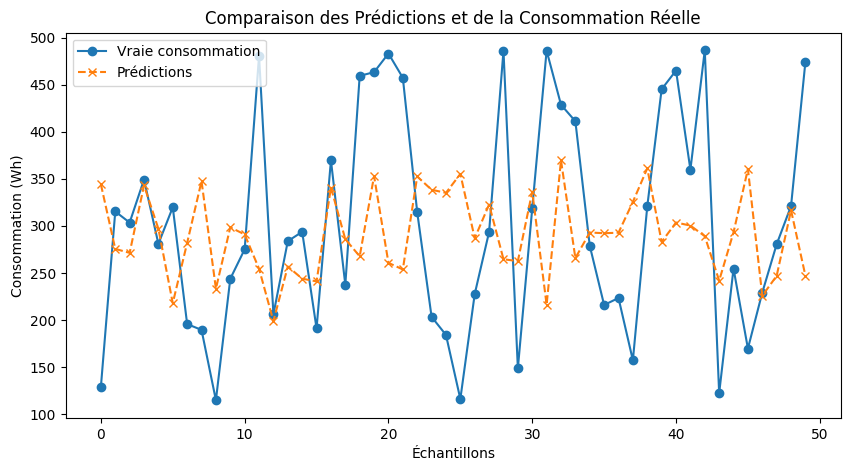

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Vraie consommation", marker="o")
plt.plot(y_pred[:50], label="Pr√©dictions", linestyle="dashed", marker="x")
plt.xlabel("√âchantillons")
plt.ylabel("Consommation (Wh)")
plt.title("Comparaison des Pr√©dictions et de la Consommation R√©elle")
plt.legend()
plt.show()


## **Logique Floue**

Exemple de r√®gles floues :

üîπ Si temp√©rature √©lev√©e ET pr√©sence d√©tect√©e ‚Üí R√©duire la climatisation mod√©r√©ment.

üîπ Si luminosit√© faible ET pr√©sence d√©tect√©e ‚Üí Augmenter l'√©clairage progressivement.

üîπ Si consommation trop √©lev√©e ‚Üí Optimiser l‚Äôalimentation en √©nergie.



In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 920.8/920.8 kB 15.0 MB/s eta 0:00:00


**D√©finition des Variables Floues**
**On cr√©e des ensembles flous pour la temp√©rature, la luminosit√©, la pr√©sence et la consommation √©nerg√©tique.**

In [ ]:
# D√©finition des variables d'entr√©e
temp√©rature = ctrl.Antecedent(np.arange(15, 31, 1), 'temp√©rature')
luminosit√© = ctrl.Antecedent(np.arange(100, 801, 50), 'luminosit√©')
pr√©sence = ctrl.Antecedent(np.arange(0, 2, 1), 'pr√©sence')

# Variable de sortie : consommation √©nerg√©tique
consommation = ctrl.Consequent(np.arange(100, 501, 50), 'consommation')

# D√©finition des ensembles flous
temp√©rature.automf(3)  # ['poor', 'average', 'good'] ‚Üí ['basse', 'moyenne', '√©lev√©e']
luminosit√©.automf(3)
pr√©sence['absent'] = fuzz.trimf(pr√©sence.universe, [0, 0, 1])
pr√©sence['pr√©sent'] = fuzz.trimf(pr√©sence.universe, [0, 1, 1])

consommation['faible'] = fuzz.trimf(consommation.universe, [100, 150, 250])
consommation['moyenne'] = fuzz.trimf(consommation.universe, [200, 300, 400])
consommation['√©lev√©e'] = fuzz.trimf(consommation.universe, [350, 450, 500])


**Cr√©ation des R√®gles Floues**
**On d√©finit les r√®gles qui r√©gissent le comportement du syst√®me.**

In [ ]:
rule1 = ctrl.Rule(temp√©rature['poor'] & pr√©sence['pr√©sent'], consommation['faible'])
rule2 = ctrl.Rule(temp√©rature['average'] & pr√©sence['pr√©sent'], consommation['moyenne'])
rule3 = ctrl.Rule(temp√©rature['good'] & pr√©sence['pr√©sent'], consommation['√©lev√©e'])
rule4 = ctrl.Rule(luminosit√©['poor'] & pr√©sence['pr√©sent'], consommation['moyenne'])
rule5 = ctrl.Rule(luminosit√©['good'], consommation['faible'])
rule6 = ctrl.Rule(pr√©sence['absent'], consommation['faible'])


**Cr√©ation du Syst√®me Flou**
**On compile les r√®gles et on cr√©e un simulateur de d√©cision floue.**

In [ ]:
# Cr√©ation du syst√®me de contr√¥le
consommation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
consommation_sim = ctrl.ControlSystemSimulation(consommation_ctrl)

# Test du syst√®me avec des valeurs r√©elles
consommation_sim.input['temp√©rature'] = 28  # ¬∞C
consommation_sim.input['luminosit√©'] = 200  # lux
consommation_sim.input['pr√©sence'] = 1  # Pr√©sence d√©tect√©e

# Calcul de la d√©cision
consommation_sim.compute()
print(f"Consommation √©nerg√©tique optimis√©e : {consommation_sim.output['consommation']:.2f} Wh")


Consommation √©nerg√©tique optimis√©e : 357.11 Wh
